In [1]:
import json
import os
import sys
from tqdm.notebook import tqdm
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, ConcatDataset
from torch.autograd import Variable
import cv2

sys.path.append('../train/trainer')
sys.path.append('../evaluation')
sys.path.append('../experiment_utils')

from experiment_utils import load_data_from_env, load_model
from visualization_utils import *

ModuleNotFoundError: No module named 'dill'

In [2]:
# RUN
class Parser():
    def __init__(self):
        pass
args = Parser()
args.models = []
args.node_type = 'VEHICLE'
args.ph_list = [12]
args.k = [5]
args.max_hl = 4
args.override_attention_radius = []
args.scene_freq_mult_train = False
args.min_scene_interaction_density = -1

print("\n\nmodel")
print("-----")
print("Gebe den Pfad des Modells an")

print("\n\ndata_dir")
print("------------")
print("Gebe den Pfad des Datensatzes an")



model
-----
Gebe den Pfad des Modells an


data_dir
------------
Gebe den Pfad des Datensatzes an


In [89]:
# INPUT
model = "MANTRA/nuScenes_Boston"
data_dir = "openDD"

In [90]:
# RUN
env, _ = present_env(args, data_dir, model="../../../experiments/Trajectron/models/robot/nuScenes_Boston");


Loading from ../../../experiments/Trajectron/models/robot/nuScenes_Boston/model_registrar-70.pt
Loaded!



 31%|███▏      | 5/16 [00:00<00:00, 49.61it/s]




Loaded data from ../../../datasets/processed/Trajectron_format/openDD/openDD_test_middle.pkl


100%|██████████| 16/16 [00:00<00:00, 48.59it/s]






scene_id
--------
Wähle eine 'scene_id' aus:
['0', '1', '2', '3', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


In [91]:
# INPUT
args.scene_name = '0'

In [92]:
# RUN
scene= present_scene(env, scene_id=args.scene_name)





Der Name der Szene lautet: 0




node_id
----------
In der Szene gibt es 12 Fahrzeuge.

['0', '2', '1', '3', '5', '6', '7', '8', '4', '9', '10', '11']

Wähle die node_id des zu visualisierenden Fahrzeugs


In [93]:
# INPUT
args.node_id = '0'

In [94]:
# RUN
node = present_node(scene, node_id=args.node_id)





timestep
--------------
node VEHICLE/0 erscheint zwischen den Zeitschritten 4-10.
Gebe den zu visualisierenden Zeitschritt ein.


In [97]:
# INPUT
timestep = 5

scenes:   0%|          | 0/16 [00:00<?, ?it/s]

process node:   0%|          | 0/13 [00:00<?, ?it/s]

                                                    



Loaded model from ../models/training_IRM/MANTRA/nuScenes_Boston with not updated memory.


preprocess eval data: openDD


process node:   0%|          | 0/31 [00:00<?, ?it/s]

                                                    
environments: 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]


eval dataset size, before shorten: 7
eval dataset size, after shorten: 7






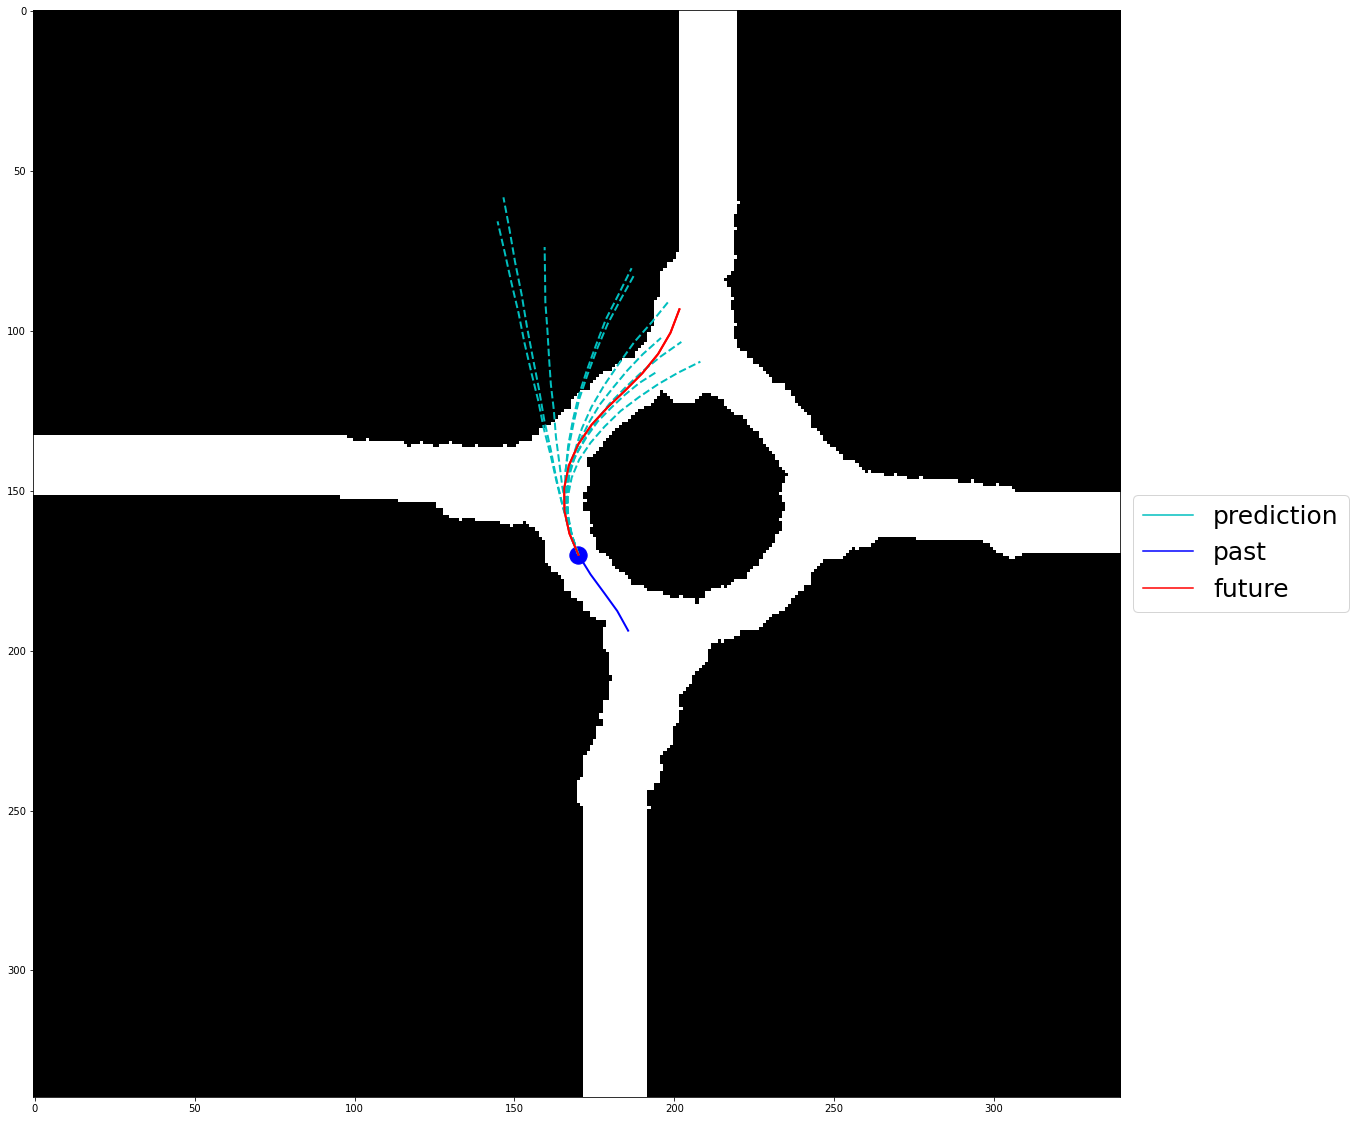

In [104]:
# RUN
args.past_len = 4
args.future_len = 12
args.dt=0.5
args.dim_clip=170
args.batch_size = 32


args.device = 'cpu'
args.preds = 10
args.speed = "_"
args.use_robot_trajectories = False
args.num_eval_samples = None
args.preprocess_workers = 0
args.shuffle_loader = False

mem_n2n = load_model("training_IRM", model)
dataset, dataloader = load_data_from_env(
    args,
    data_dir=data_dir,
    train=False)
ph = 4
idx = timestep - (node.first_timestep + args.past_len)
sample = sample_np2torch(dataset[idx])
mem_n2n = plot_sample(mem_n2n, args, sample, mode='IRM', k_max=10)